In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':[10,10]},font_scale=1.3)
df = pd.read_csv('corona.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [3]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   summary                1080 non-null   object 
 4   location               1085 non-null   object 
 5   country                1085 non-null   object 
 6   gender                 902 non-null    object 
 7   age                    843 non-null    float64
 8   symptom_onset          563 non-null    object 
 9   If_onset_approximated  560 non-null    float64
 10  hosp_visit_date        507 non-null    object 
 11  exposure_start         128 non-null    object 
 12  exposure_end           341 non-null    object 
 13  visiting Wuhan         1085 non-null   int64  
 14  from Wuhan             1081 non-null   float64
 15  deat

In [4]:
df.isnull().sum()

id                         0
case_in_country          197
reporting date             1
summary                    5
location                   0
country                    0
gender                   183
age                      242
symptom_onset            522
If_onset_approximated    525
hosp_visit_date          578
exposure_start           957
exposure_end             744
visiting Wuhan             0
from Wuhan                 4
death                      0
recovered                  0
symptom                  815
source                     0
link                       0
dtype: int64

In [5]:
df['case_in_country'].value_counts()

1.0      37
2.0      24
3.0      22
6.0      19
9.0      19
         ..
149.0     1
147.0     1
141.0     1
135.0     1
140.0     1
Name: case_in_country, Length: 197, dtype: int64

In [6]:
df['case_in_country'].fillna(df['case_in_country'].median(), inplace=True)

In [7]:
df['gender'].value_counts()

male      520
female    382
Name: gender, dtype: int64

In [9]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

In [10]:
df['age'].value_counts()

55.0    72
65.0    52
45.0    39
75.0    37
35.0    36
        ..
1.0      1
0.5      1
87.0     1
84.0     1
91.0     1
Name: age, Length: 85, dtype: int64

In [11]:
df['age'].fillna(df['age'].median(), inplace=True)

In [12]:
df['symptom_onset'].value_counts()

1/23/2020     27
1/25/2020     22
1/24/2020     21
1/30/2020     19
02/03/20      18
              ..
01/15/2020     1
01/04/20       1
01/02/20       1
12/22/2019     1
12/29/2019     1
Name: symptom_onset, Length: 70, dtype: int64

In [13]:
df['symptom_onset'].fillna(df['symptom_onset'].mode()[0], inplace=True)

In [14]:
df['If_onset_approximated'].value_counts()

0.0    536
1.0     24
Name: If_onset_approximated, dtype: int64

In [15]:
df['If_onset_approximated'].fillna(df['If_onset_approximated'].mean(), inplace=True)

In [16]:
df['hosp_visit_date'].fillna(df['hosp_visit_date'].mode()[0], inplace=True)

In [17]:
df['exposure_start'].value_counts()

1/26/2020     14
1/24/2020     12
1/20/2020      8
1/25/2020      7
1/23/2020      6
01/12/20       6
1/22/2020      6
1/19/2020      5
01/11/20       5
01/10/20       5
2/19/2020      5
1/13/2020      4
1/18/2020      4
1/15/2020      3
01/09/20       3
1/21/2020      3
2/15/2020      3
01/08/20       3
1/17/2020      2
01/13/2020     2
1/27/2020      2
02/12/20       2
01/03/20       2
01/19/2020     1
2/17/2020      1
1/16/2020      1
12/29/2019     1
12/17/2019     1
12/20/2019     1
2/21/2020      1
1/30/2020      1
01/06/20       1
02/11/20       1
2/20/2020      1
1/28/2020      1
02/04/20       1
12/24/2019     1
02/10/20       1
1/14/2020      1
Name: exposure_start, dtype: int64

In [23]:
df['exposure_start'].fillna(df['exposure_start'].mode()[0], inplace=True)

In [24]:
df['exposure_end'].fillna(df['exposure_start'].mode()[0], inplace=True)

In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df['from Wuhan'] = imputer.fit_transform(df[['from Wuhan']])

In [26]:
df['symptom'].fillna(df['exposure_start'].mode()[0], inplace=True)

In [27]:
df['reporting date'].fillna(df['reporting date'].mode()[0], inplace=True)
df['summary'].fillna(df['summary'].mode()[0], inplace=True)

In [28]:
df.isnull().sum()

id                       0
case_in_country          0
reporting date           0
summary                  0
location                 0
country                  0
gender                   0
age                      0
symptom_onset            0
If_onset_approximated    0
hosp_visit_date          0
exposure_start           0
exposure_end             0
visiting Wuhan           0
from Wuhan               0
death                    0
recovered                0
symptom                  0
source                   0
link                     0
dtype: int64

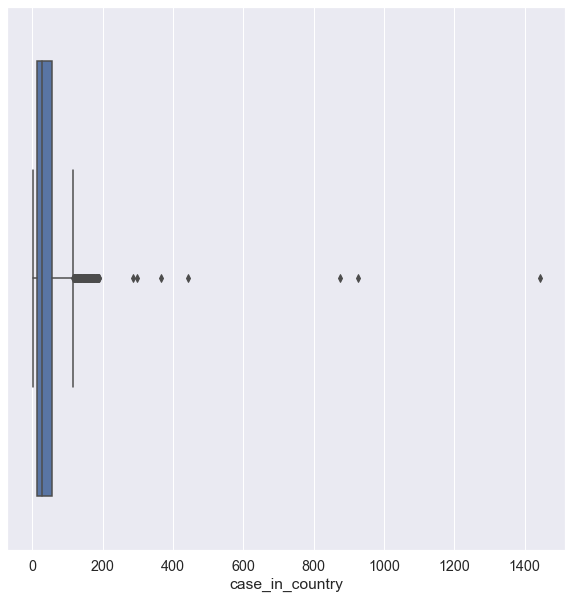

In [29]:
sns.boxplot(x='case_in_country', data=df)

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

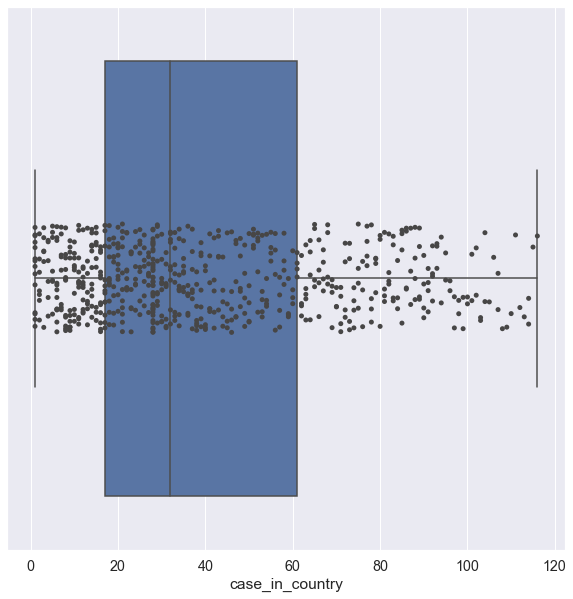

In [31]:
sns.boxplot(x='case_in_country', data=df)
sns.stripplot(x='case_in_country', data=df, color="#474646")

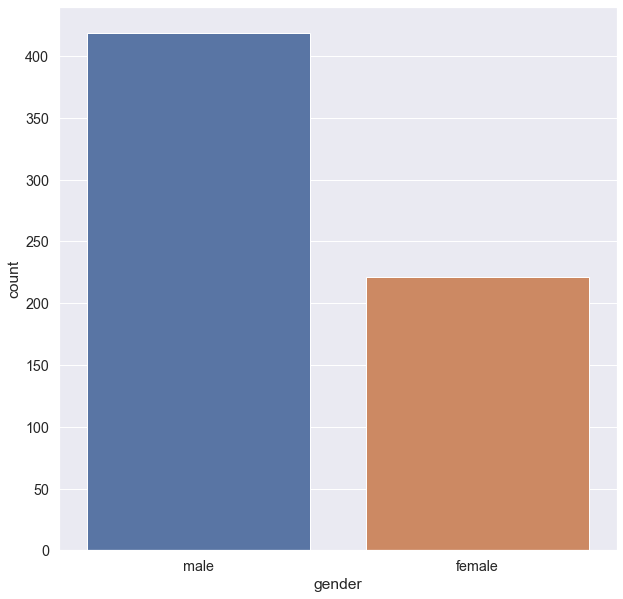

In [32]:
sns.countplot(x='gender', data=df)

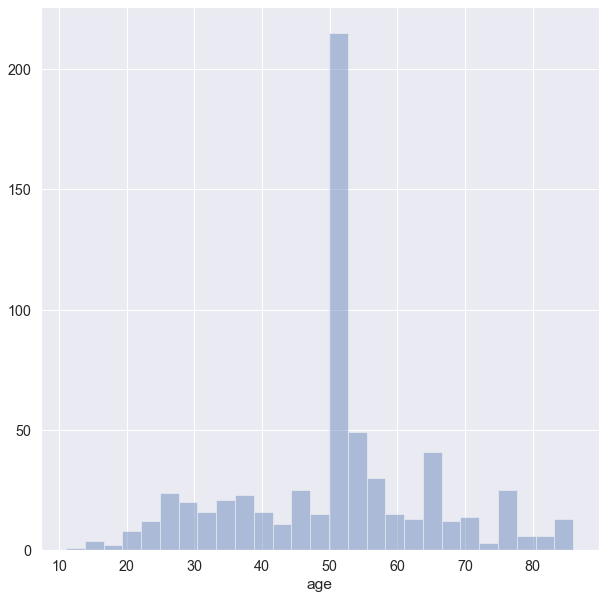

In [36]:
sns.distplot(df['age'], kde=False)

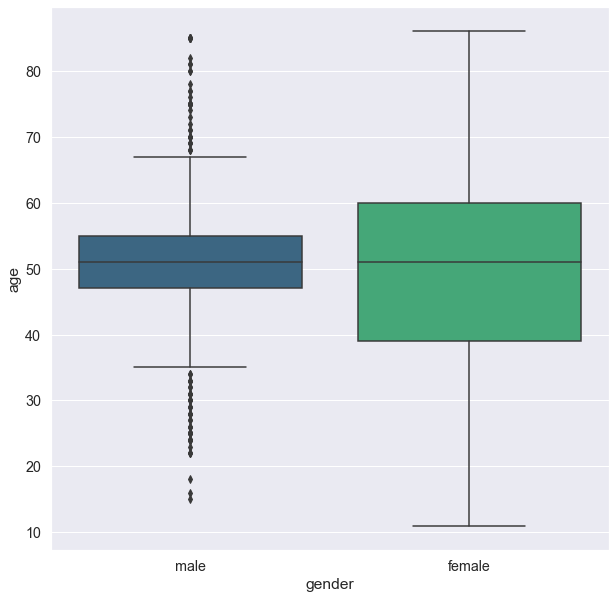

In [43]:
sns.boxplot(x='gender', y='age', data=df, palette='viridis')

In [44]:
x = df.drop('age', axis=1)
y = df['age']

In [45]:
x.shape

(640, 19)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [48]:
x_train.shape

(512, 19)

In [49]:
x_test.shape

(128, 19)